In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

def smooth(data,k):
    array = np.zeros((len(data)))
    for i in range(len(data)):
        if i<k:
            array[i]=np.mean(data[:i+1])
        else: 
            array[i]=np.mean(data[i-k:i+1])

    return array
    

def plot_results(file):
    data = pd.read_csv(file)
    data['time_sum']=np.cumsum(data['time'].copy())
    data['mean_reward_sum']=np.cumsum(data['mean_reward'].copy())
    data['score_sum']=np.cumsum(data['score'].copy())
    t = 'Train -  Mean score : '+str(round(np.mean(data.score),2))+' Mean time : '+str(round(np.mean(data.time),2))
    data['reward_sum_smooth'] =smooth(data['mean_reward'].copy(),100)
    data['loss_smooth'] =smooth(data['loss'].copy(),10)
    data['score_smoth'] =smooth(data['score'].copy(),100)

    score = pd.DataFrame(data={'train': data['score']})
    time = pd.DataFrame(data={'train': data['time']})
    fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(18,9),gridspec_kw={'width_ratios': [3, 1,1]})
    gs = axs[0, 1].get_gridspec()
    for ax in axs[0:, 1]:
        ax.remove()
    for ax in axs[0:, 2]:
        ax.remove()
    for ax in axs[0:, 0]:
        ax.remove()
    fig.suptitle(t, fontsize=16)

    ax10 = fig.add_subplot(gs[0, 0])
    ax10.set_title('Sum of reward by epochs')
    ax10.set_ylabel('Epsilon')
    data.plot(x="game", y="eps",ax=ax10, legend=False)
    ax2 = ax10.twinx()
    ax2.set_ylabel('score')
    data.plot(x="game", y='score_smoth', ax=ax2, legend=False, color="g")

    ax3 = fig.add_subplot(gs[1, 0])
    ax3.set_title('Cumulative reward')
    ax3.set_ylabel('Epsilon')
    data.plot(x="game", y="eps",ax= ax3, legend=False)
    ax4 = ax3.twinx()
    ax4.set_ylabel('Reward')
    data.plot(x="game", y='loss_smooth', ax=ax4, legend=False, color="r")


    ax7 = fig.add_subplot(gs[0:, 1])
    ax7 = sns.boxplot(x='Training mode', y="score", data=pd.melt(score,var_name='Training mode', value_name='score'))

    ax8 = fig.add_subplot(gs[0:, 2])
    ax8 = sns.boxplot(x='Training mode', y="time", data=pd.melt(time,var_name='Training mode', value_name='time'))

    fig.tight_layout()
    plt.show()
    

def plot_boxPlot_score(fname,ftest):
        data = pd.read_csv(fname)
        #data = data[:,1:]
        #print(len(data))
        data2 = pd.read_csv(ftest)
        #data2 = data2[:,1:]
        #print(len(data2))
        #d = [data['score'].to_numpy(),]
        #d = {'col1': data['score'], 'col2': data2['score']}
        score = pd.DataFrame(data={'train': data['score'], 'test': data2['score']})
        time = pd.DataFrame(data={'train': data['time'], 'test': data2['time']})
        #sns.boxplot(y=['col1','col2'],data=df)
        sns.boxplot(x="variable", y="value", data=pd.melt(df))
        #fig, ax= plt.subplots(figsize=(5,7))
        #plt.boxplot(d)
        #sns.boxplot(y=)
        #plt.title("Box plot Score")
        #ax.set_xticklabels(['Train','Test'])
        #plt.show()


### Reward Function
---
---
- Touch the Apple = 10
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -1
- Getting Clother of the Apple = 1

# Qtable 
---
---

### States (126)
- Surrowding Head : 8
- Direction Apple : 8 

---

### Features  

- Learning Rate = 0.0001
- Discount Factor = 0.99
- Training : 5000 epochs
- Max time training: 1500 steps

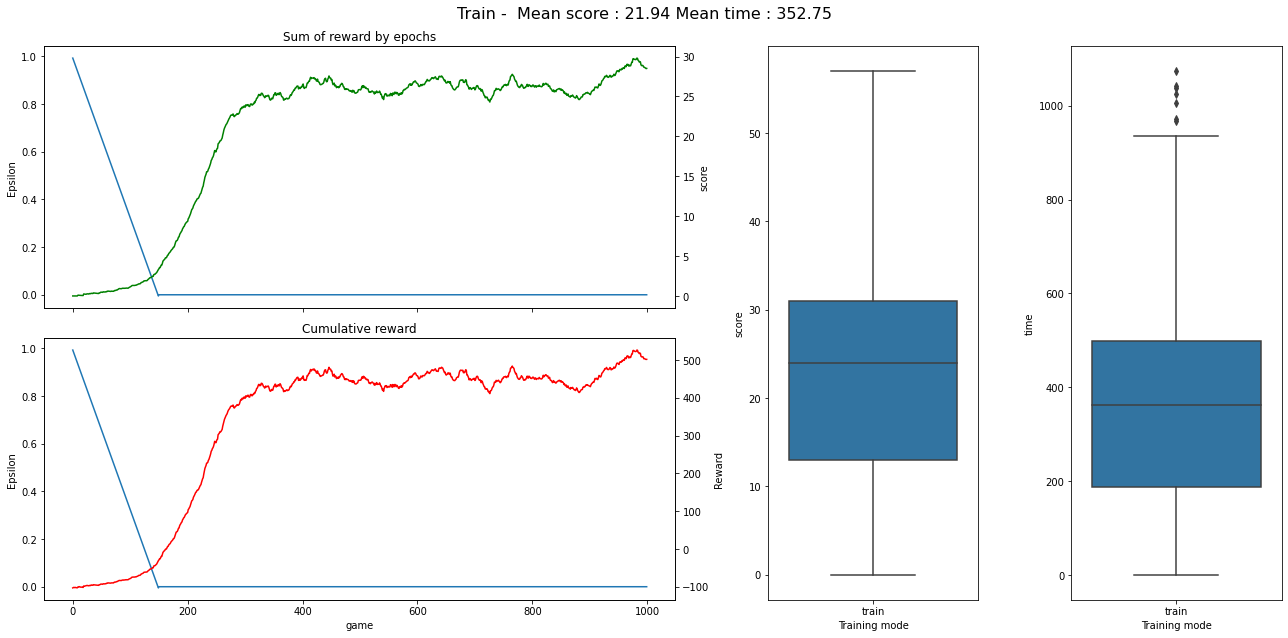

In [21]:
plot_results('score/Qtable_lr_0.001.csv')

## Qnetwork 1
---
---

### Reward 1 

### States 
- Surrowding Head : 15
- Direction of the apple
- Direction of Head


----

### Features 
- Learning Rate = 0.0001
- Discount Factor = 0.99
- Training : 1500 epochs
- Time steps max : 5000
---

### Neural Network 
- Batch Size : 512
- Input Layer : 17
--- 

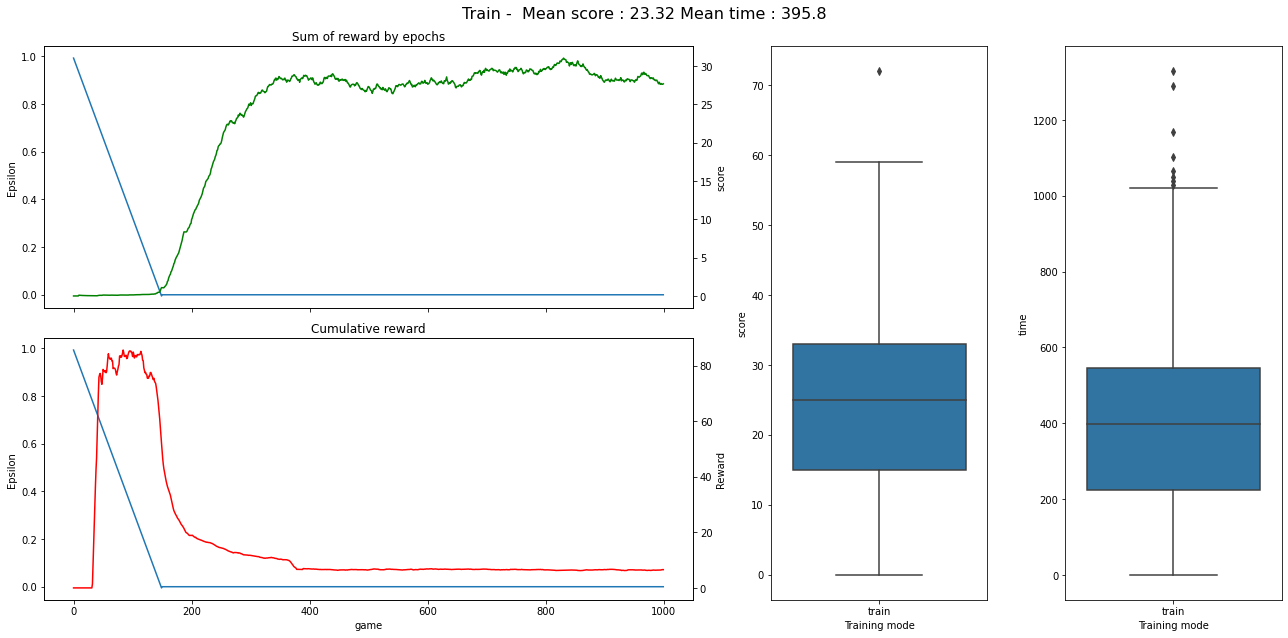

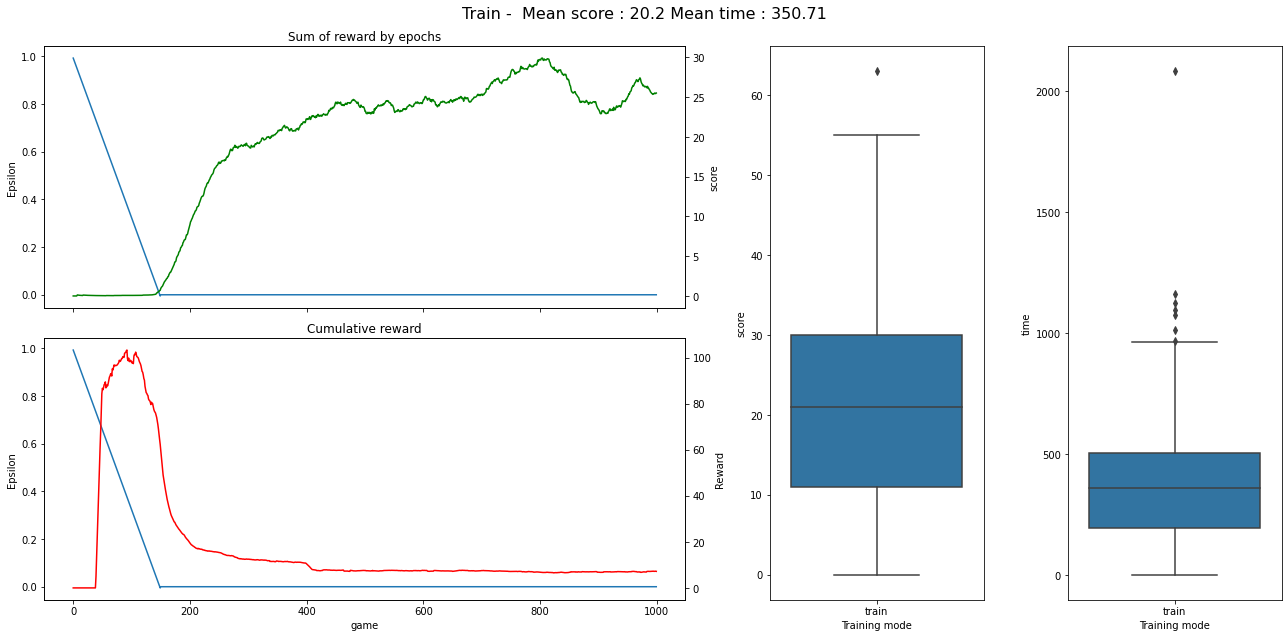

In [6]:
plot_results('score/Qnet1_B512_Lr0.0001_H2_64_32.csv')
plot_results('score/DQnet1.50_B512_Lr0.0001_H2_64_32.csv')

## Qnetwork 2
---
---

### Reward 1 

### States 
- Surrowding Head : 15
- Relative position apple
- directon head


----

### Features 
- Learning Rate = 0.0001
- Discount Factor = 0.99
- Training : 1500 epochs
- Time steps max : 5000
---

### Neural Network 
- Batch Size : 512
- Input Layer : 18
--- 

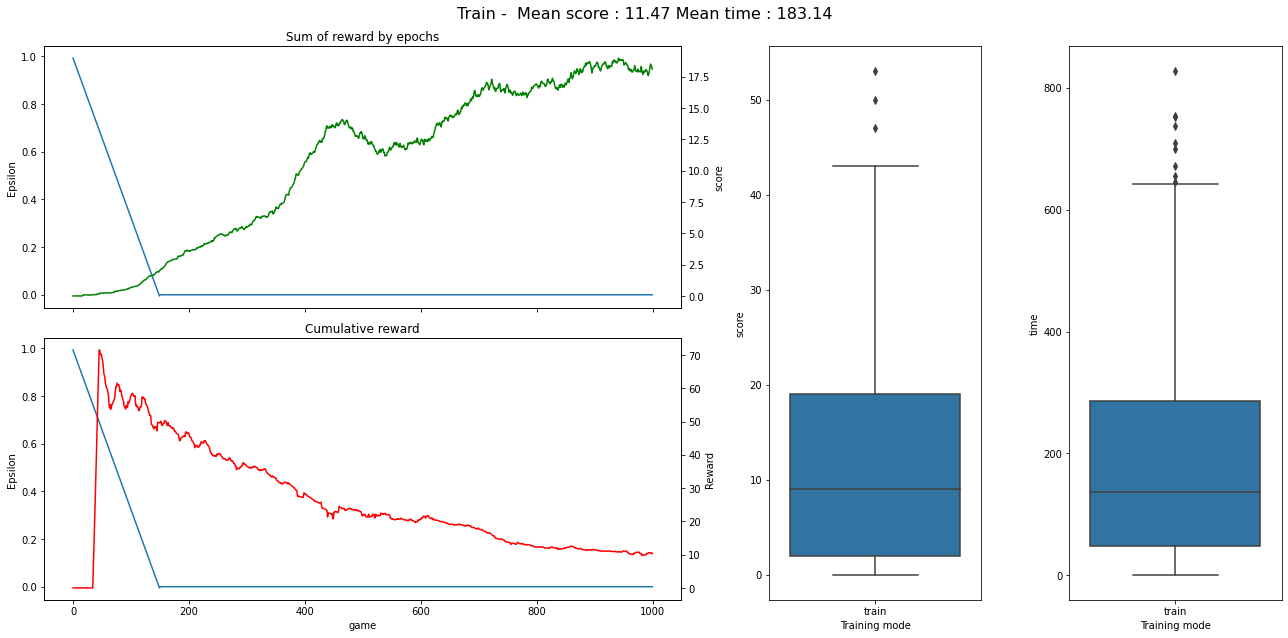

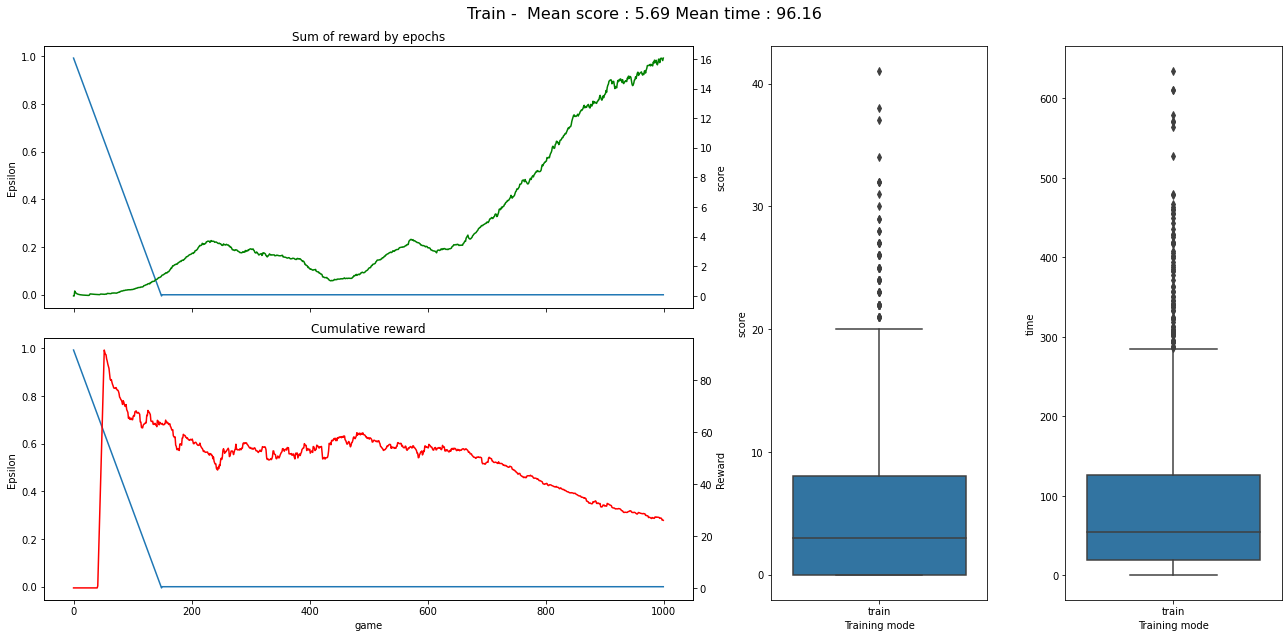

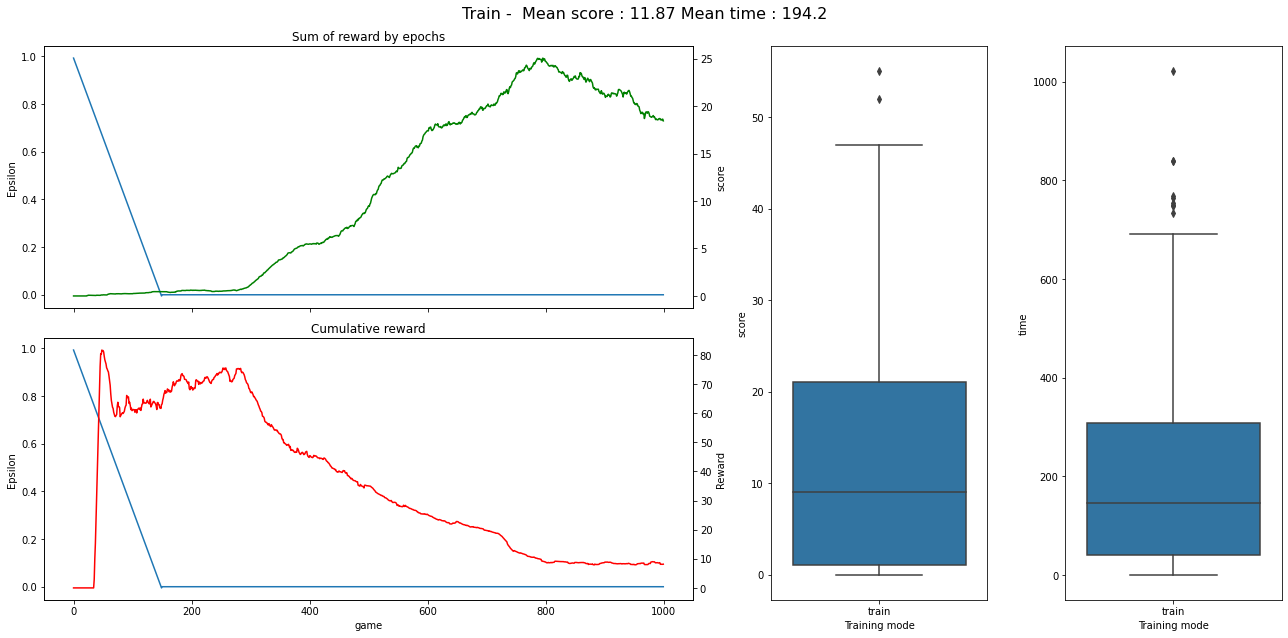

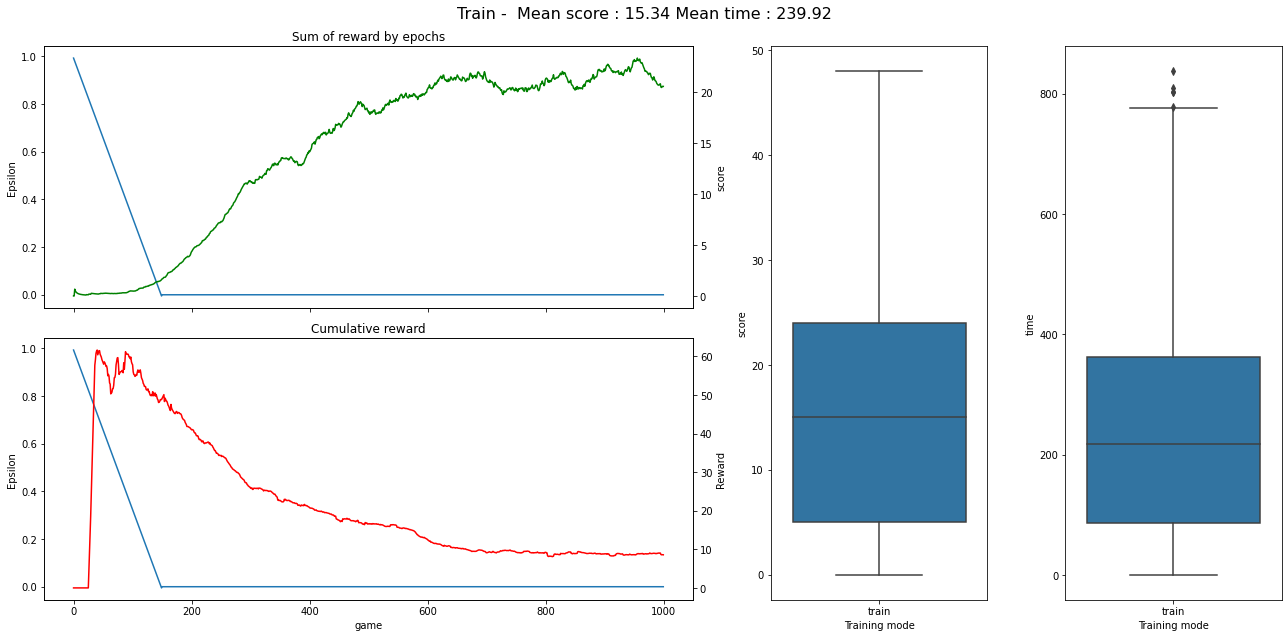

In [13]:
plot_results('score/Qnet2_B512_Lr0.0001_H2_128_128.csv')
plot_results('score/Qnet2_B512_Lr0.0001_H2_128_64.csv')
plot_results('score/DQnet2_B512_Lr0.0001_H2_128_128.csv')
plot_results('score/DQnet2.1_B512_Lr0.0001_H2_128_64.csv')
